# Question 1: When is it most profitable to release movies?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set table to variable
df = pd.read_csv('joined_gross_budget_cleaned.csv')

In [3]:
df.head() #checking the layout

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
0,(500) Days of Summer,7.0,2009,7500000.0,32425665.0,34439060.0,26939060.0,78.22
1,10 Cloverfield Lane,3.0,2016,5000000.0,72082999.0,108286422.0,103286422.0,95.38
2,10 Things I Hate About You,3.0,1999,13000000.0,38177966.0,60413950.0,47413950.0,78.48
3,"10,000 B.C.",3.0,2008,105000000.0,94784201.0,269065678.0,164065678.0,60.98
4,12 Monkeys,12.0,1995,29000000.0,57141459.0,168841459.0,139841459.0,82.82


In [4]:
# checking for datatypes in table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
title                3657 non-null object
month                3657 non-null float64
year                 3657 non-null int64
production_budget    3657 non-null float64
domestic_gross       3657 non-null float64
worldwide_gross      3657 non-null float64
net_prof             3657 non-null float64
net_margin_%         3657 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 228.7+ KB


In [5]:
# Change month from float to int
df['month'] = df['month'].astype(int)
df['month'].dtype

dtype('int32')

In [6]:
df['title'] = df['title'].astype(str)
df['title'].dtype

dtype('O')

In [7]:
# Change order to month
df = df.sort_values(by='month')
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
950,Fish Tank,1,2010,3000000.0,374675.0,5922292.0,2922292.0,49.34
310,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,8800000.0,7000000.0,79.55
2731,The Boy Next Door,1,2015,4000000.0,36006065.0,53401938.0,49401938.0,92.51
2733,The Boys from Brazil,1,1978,12000000.0,19000000.0,19000000.0,7000000.0,36.84
2743,The Butterfly Effect,1,2004,13000000.0,57924679.0,95638592.0,82638592.0,86.41


In [8]:
# separating the relevent values for profit margin
margin = df[['month','production_budget', 'net_margin_%']]
margin.head()

,month,production_budget,net_margin_%
950,1,3000000.0,49.34
310,1,1800000.0,79.55
2731,1,4000000.0,92.51
2733,1,12000000.0,36.84
2743,1,13000000.0,86.41


In [9]:
#checking max of margin to determine y range
margin['net_margin_%'].max()

99.94

[Text(0, 0.5, 'Net Profit Margin'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Seasonal Profitability')]

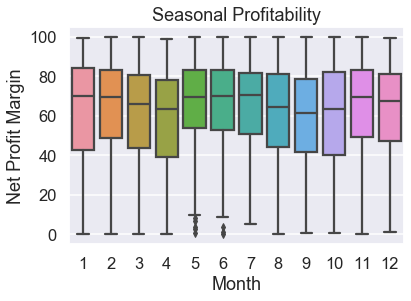

In [10]:
sns.set_style('darkgrid')
sns.set_context('talk')

# marginal profit plot
sns.boxplot(x=margin['month'], y=margin['net_margin_%']
                  ).set(xlabel='Month', ylabel='Net Profit Margin',
                        title='Seasonal Profitability')

# Question: How has budget increased over the years?

In [11]:
df.head()

,title,month,year,production_budget,domestic_gross,worldwide_gross,net_prof,net_margin_%
950,Fish Tank,1,2010,3000000.0,374675.0,5922292.0,2922292.0,49.34
310,Battle for the Planet of the Apes,1,1973,1800000.0,8800000.0,8800000.0,7000000.0,79.55
2731,The Boy Next Door,1,2015,4000000.0,36006065.0,53401938.0,49401938.0,92.51
2733,The Boys from Brazil,1,1978,12000000.0,19000000.0,19000000.0,7000000.0,36.84
2743,The Butterfly Effect,1,2004,13000000.0,57924679.0,95638592.0,82638592.0,86.41


In [12]:
#filtering out dates prior to 2010
budget_years = df[df['year'] >= 1990]
budget_years.shape

(3207, 8)

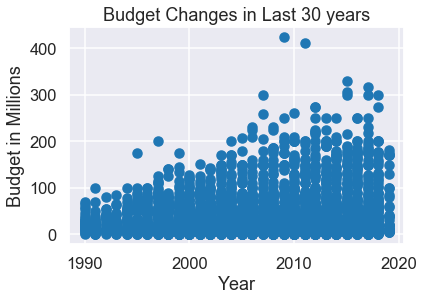

In [13]:
# plotting graph
plt.scatter(budget_years['year'], budget_years['production_budget'].map(
            lambda x: x/1000000), label=
            'Change over the years')
#adding labels
plt.xlabel('Year'), plt.ylabel('Budget in Millions')
plt.title('Budget Changes in Last 30 years')

plt.show()

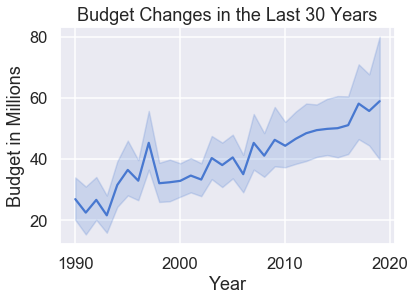

In [39]:
# creating plot and converting y-axis to be values of millions 
sns.set_style('darkgrid')
sns.set_context('talk')
ax = sns.lineplot(x=budget_years['year'], y=budget_years[
    'production_budget'].map(lambda x: x/1000000), data = budget_years).set(xlabel='Year', ylabel=
                        'Budget in Millions',
                        title='Budget Changes in the Last 30 Years')
                 

In [17]:
#checking median values to better understand data
df.production_budget.median()

20000000.0

In [30]:
t2000 = df[df['year'] >=2000]
t2000.production_budget.mean()

44446594.607916355

IndexError: too many indices for array

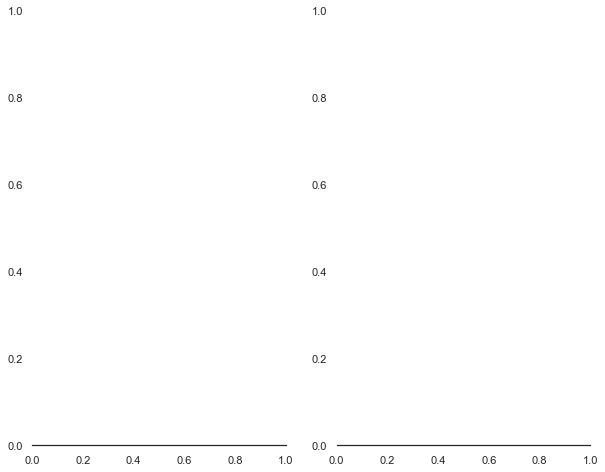